# Part II - Loan Data Explanation
## by Yusuff O. Olaniyi

## Investigation Overview

> In this investigation, I want to look at the features that contribute to having good credit score and the effect of same on Loan amount. The main focus was on the original loan amount, credit score, borrower's stated monthly income, Employment Status and Occupation.


## Dataset Overview

> The dataset contains 111207 loans with 21 features (including LoanOriginalAmount, CreditScore, BorrowerAPR, StatedMonthlyIncome, EmploymentStatus and many others)

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
# Read clean data
# prosper = pd.read_csv('prosperLoan_cleaned.csv')

prosper = pd.read_pickle("./prosperLoan_cleaned.pkl")

In [4]:
prosper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111207 entries, 0 to 113936
Data columns (total 21 columns):
LoanOriginalAmount             111207 non-null int64
BorrowerAPR                    111207 non-null float64
BorrowerRate                   111207 non-null float64
DebtToIncomeRatio              111207 non-null float64
StatedMonthlyIncome            111207 non-null float64
Term                           111207 non-null int64
BorrowerState                  111207 non-null object
LoanOriginationDate            111207 non-null object
Occupation                     111207 non-null object
EmploymentStatus               111207 non-null category
MonthlyLoanPayment             111207 non-null float64
Investors                      111207 non-null int64
InvestmentFromFriendsCount     111207 non-null int64
InvestmentFromFriendsAmount    111207 non-null float64
Recommendations                111207 non-null int64
IsBorrowerHomeowner            111207 non-null bool
Month                   

### Distribution of loans listed year, Quarter and month wise
> January has the highest number of loans listed as expected from starting of new year, whereas april sees the least number of loans listed. Despite this, the fourth quarter recorded the highest number of laons. There is an upward trend in loans listed with each passing year from 2009 to 2013 while there is a reduction in the number of loans in 2014

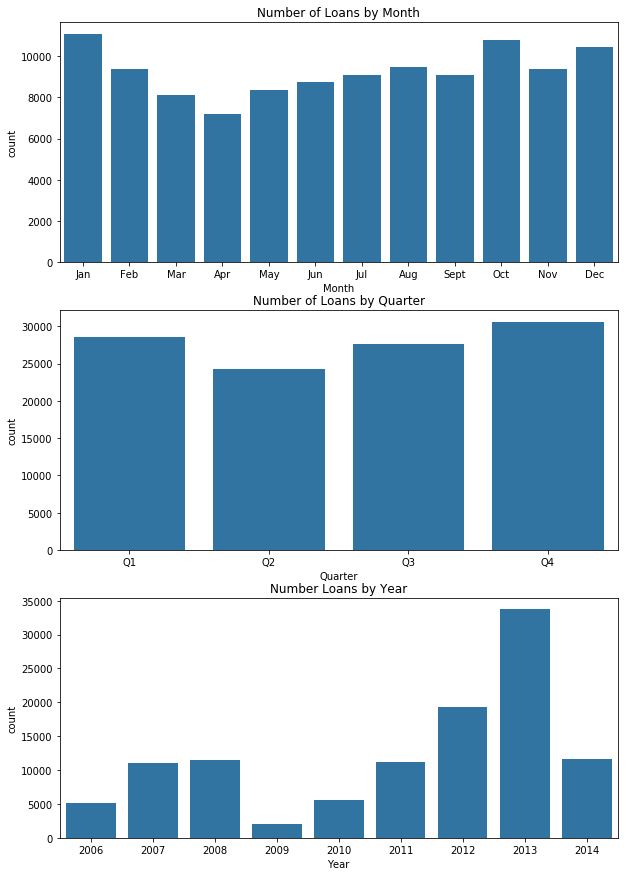

In [10]:
fig, ax = plt.subplots(nrows=3, figsize = [10,15])

default_color = sb.color_palette()[0]
sb.countplot(data = prosper, x = 'Month', color = default_color, ax = ax[0])
ax[0].set_title('Number of Loans by Month')

sb.countplot(data = prosper, x = 'Quarter', color = default_color, ax = ax[1])
ax[1].set_title('Number of Loans by Quarter')

sb.countplot(data = prosper, x = 'Year', color = default_color, ax = ax[2])
ax[2].set_title('Number Loans by Year');

### Distribution of Borrower APR
> The distribution of APR looks multimodal. A small peak centered at 0.1, a large peak centered at 0.2. There is also a small peak centered 0.3. Additionally, there is a very shape peak between 0.35 and 0.36. Only very few loans have APR greater than 0.43.

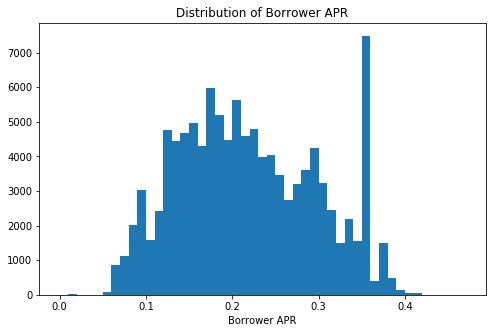

In [5]:
bins = np.arange(0, prosper.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = prosper, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR')
plt.title('Distribution of Borrower APR');

### Distribution of DebtToIncomeRatio
> Distribution has unimodal peak around 0.2 with unusual peak around 0.25 which indicates most people prefer 1:4 ratio of debt to Income which is a good thing.

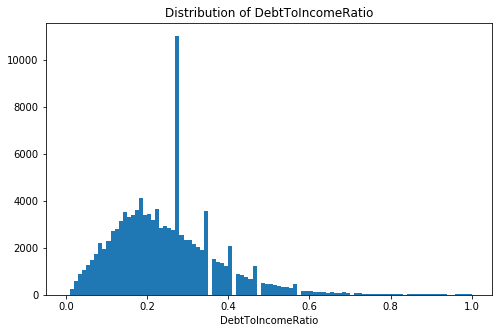

In [6]:
bins = np.arange(0,prosper['DebtToIncomeRatio'].max()+0.01, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = prosper, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('DebtToIncomeRatio');
plt.title('Distribution of DebtToIncomeRatio');

### Borrower APR vs. Loan Amount
> As the loan amount increases, the range of APR decreases. Meaning that, the borrower APR decreases with increase of loan amount

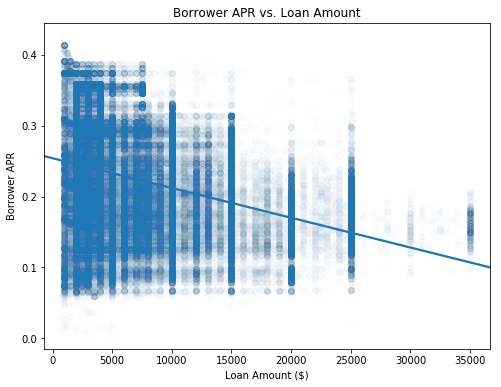

In [7]:
plt.figure(figsize = [8, 6])
sb.regplot(data = prosper, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});
plt.xlabel('Loan Amount ($)')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Loan Amount');

### Borrower APR vs. Credit Score
> The borrower APR decreases with the increasingly better score. Borrowers with the best Credit Score have the lowest APR. It means that the Credit Score has a strong effect on borrower APR.

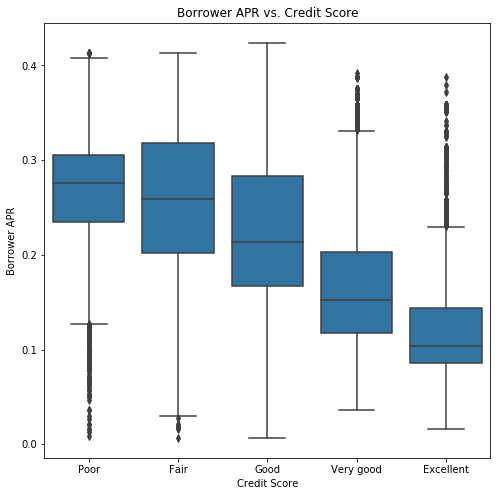

In [8]:
plt.figure(figsize=[8,8])
default_color = sb.color_palette()[0]
sb.boxplot(data=prosper, x='CreditScore', y='BorrowerAPR', color=default_color)
plt.xlabel('Credit Score')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Credit Score');

### Loan Amount vs. Cedit Score
> Borrowers with Poor credit score have most loans below 5000 and the distribution grows taller as the cedit score improves. Hence, as the credit score gets better, the loan amount also improves

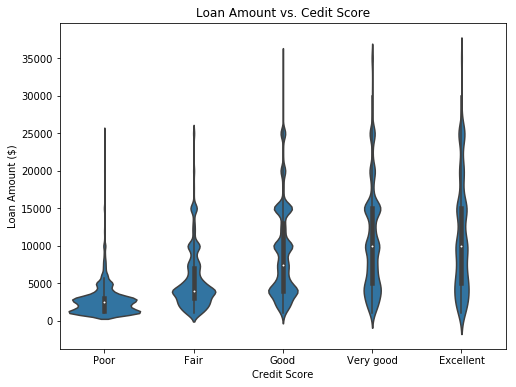

In [9]:
plt.figure(figsize = [8, 6])
default_color = sb.color_palette()[0]
sb.violinplot(data = prosper, x = 'CreditScore', y = 'LoanOriginalAmount', color=default_color);
plt.xlabel('Credit Score')
plt.ylabel('Loan Amount ($)')
plt.title('Loan Amount vs. Cedit Score');

### Effect of Credit Score on Relationship between APR and Loan Amount
> The loan amount increases with better score. The borrower APR decreases with better rating. Interestingly, the relationship between borrower APR and loan amount turns started as 0 for Poor score, then to negative for Fair, Good and Very good while positve for Excellent.

> Generally, the higher the APR the lower the loan amount, except for people with credit score of 800 and above where the loan amount increases with the APR.

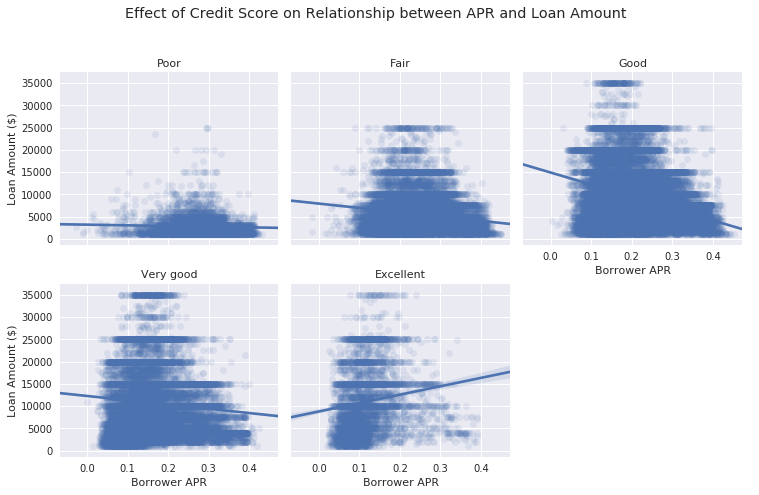

In [16]:
g=sb.FacetGrid(data=prosper,col='CreditScore', size=3.5, col_wrap=3)
g.map(sb.regplot, 'BorrowerAPR', 'LoanOriginalAmount', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.set_titles('{col_name}')
g.add_legend();
g.set_xlabels('Borrower APR')
g.set_ylabels('Loan Amount ($)')
plt.suptitle('Effect of Credit Score on Relationship between APR and Loan Amount');
plt.subplots_adjust(top=0.85)

### DebtToIncomeRatio by Employment Status and Credit Score
> Generally, the average debt-to-income ratio rises between Poor credit score and Good and then drops between Good and Excellent

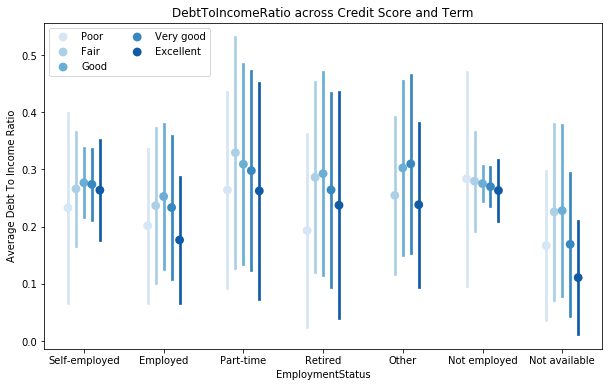

In [11]:
fig = plt.figure(figsize = [10,6])
ax = sb.pointplot(data = prosper, x = 'EmploymentStatus', y = 'DebtToIncomeRatio', hue = 'CreditScore',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('DebtToIncomeRatio across Credit Score and Term')
plt.ylabel('Average Debt To Income Ratio')
ax.legend(ncol = 2)
ax.set_yticklabels([],minor = True);

### StatedMonthlyIncome and LoanOriginalAmount by Employment Status and Credit Score
> It seems loan amount is more dependent on credit score than employment status as unemployed borrowers with excellent credit score have an average loan of 8000. 

> Meanwhile, Unemployed borrowers earn the least monthly income, as the monthly income increase with better credit score for all employment status. Also, except for borrowers whose employment status is 'Not available, loan amount also increases with better credit score.

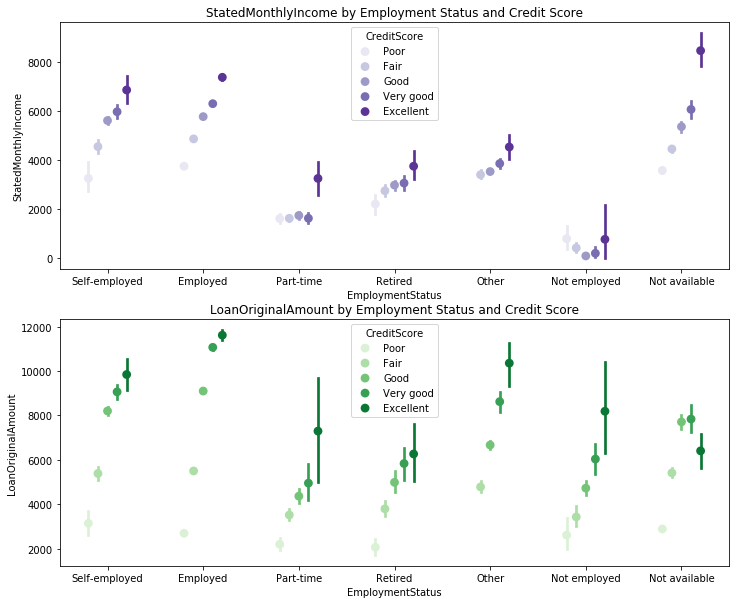

In [13]:
fig, ax = plt.subplots(nrows=2, figsize=[12,10])
sb.pointplot(data = prosper, x = 'EmploymentStatus', y = 'StatedMonthlyIncome', hue = 'CreditScore',
           palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[0])
ax[0].set_title('StatedMonthlyIncome by Employment Status and Credit Score')

sb.pointplot(data = prosper, x = 'EmploymentStatus', y = 'LoanOriginalAmount', hue = 'CreditScore',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1])
ax[1].set_title('LoanOriginalAmount by Employment Status and Credit Score')
sb.set(rc = {'figure.figsize':(14,8)});

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 804708 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not 